In [3]:
!pip uninstall geopandas
!pip install pandas fiona shapely pyproj rtree
!pip install osmnet
!pip install matplotlib
!pip install osmnet
!pip install pandana
!pip install folium
!pip install geopandas

     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 40.8 MB/s 
     |████████████████████████████████| 994 kB 51.7 MB/s 
     |████████████████████████████████| 994 kB 12.5 MB/s 
     |████████████████████████████████| 1.7 MB 6.8 MB/s 


In [4]:
!pip install -q xlrd
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 1930 (delta 309), reused 500 (delta 270), pack-reused 1340
Receiving objects: 100% (1930/1930), 178.53 MiB | 24.89 MiB/s, done.
Resolving deltas: 100% (986/986), done.
Checking out files: 100% (542/542), done.


In [22]:
!pip install selenium

     |████████████████████████████████| 904 kB 6.5 MB/s 


In [23]:
import geopandas as gpd
import folium
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.cluster import KMeans
from geopandas.tools import sjoin
from folium.plugins import HeatMap
import os
import time
from selenium import webdriver

In [6]:
data = gpd.read_file('CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')
data

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.4000,24294.9000,24292.9000,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.6000,38362.1000,38704.4000,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.1000,43857.0000,44204.0000,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.5000,35490.8000,35594.2000,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.3900,7796.0600,7616.0700,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,239826.0,241327.0,234819.0,40354.6000,40723.4000,41404.2000,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((682507.505 1189929.778, 682485.431 1..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,234291.0,237110.0,209867.0,44207.9000,45315.2000,46076.6000,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((681349.265 1190928.179, 681382.887 1..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,181780.0,183288.0,163961.0,35692.6000,35823.5000,36246.2000,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((682877.988 1195927.612, 682969.684 1..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,469526.0,470699.0,474792.0,18796.9000,19185.2000,19357.3000,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((680274.980 1198401.860, 680578.965 1..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,489657.0,490618.0,499164.0,22005.5000,22616.2000,23293.7000,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((684986.154 1194412.964, 684987.226 1..."


In [7]:

# Lưu thông tin về mặt tọa độ .crs
data.crs


<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
data["Grow_rate"] = data["Pop_2019"]/data["Pop_2017"]
data = data.sort_values(by=['Grow_rate'],axis=0,ascending=False)
data = data.to_crs(epsg = 32648)
top10 = data[:10][['Dist_Name', 'geometry','Grow_rate']]
top10

,Dist_Name,geometry,Grow_rate
16,District 9,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277619
23,Hoc Mon,"POLYGON ((673061.206 1208548.077, 673094.550 1...",1.215639
18,Nha Be,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162071
22,District 12,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129460
17,District 2,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113104
13,Cu Chi,"POLYGON ((656983.014 1228510.664, 656969.299 1...",1.103646
4,District 7,"POLYGON ((691506.715 1190058.151, 691359.893 1...",1.100641
15,Thu Duc,"POLYGON ((688796.063 1204383.598, 688818.721 1...",1.092283
14,Binh Chanh,"POLYGON ((679646.388 1186348.769, 679698.864 1...",1.080576
12,Binh Tan,"POLYGON ((674953.073 1197210.125, 674961.146 1...",1.075143


In [12]:
json_click =  gpd.read_file('/content/response3.json')
data_json = json_click.to_crs(epsg=32648)
data_json

,dbh,geometry
0,1,POINT (687074.226 1200044.747)
1,1,POINT (687752.360 1188252.815)
2,1,POINT (681813.990 1197998.313)
3,1,POINT (681761.573 1198052.679)
4,1,POINT (681442.508 1198483.069)
...,...,...
83670,1,POINT (681095.997 1199156.208)
83671,1,POINT (691495.565 1200249.907)
83672,1,POINT (689394.818 1186828.972)
83673,1,POINT (683268.233 1197009.824)


In [13]:
from geopandas.tools import sjoin
res = sjoin(data_json, top10, how='left', op='within')
res.dropna(inplace=True)
res

,dbh,geometry,index_right,Dist_Name,Grow_rate
0,1,POINT (687074.226 1200044.747),15.0,Thu Duc,1.092283
1,1,POINT (687752.360 1188252.815),4.0,District 7,1.100641
5,1,POINT (691440.136 1200531.193),15.0,Thu Duc,1.092283
8,1,POINT (689464.643 1188780.763),4.0,District 7,1.100641
9,1,POINT (689796.719 1186376.959),4.0,District 7,1.100641
...,...,...,...,...,...
83667,1,POINT (692728.451 1199608.364),15.0,Thu Duc,1.092283
83668,1,POINT (686386.722 1188157.561),4.0,District 7,1.100641
83669,1,POINT (687023.738 1187921.071),4.0,District 7,1.100641
83671,1,POINT (691495.565 1200249.907),15.0,Thu Duc,1.092283


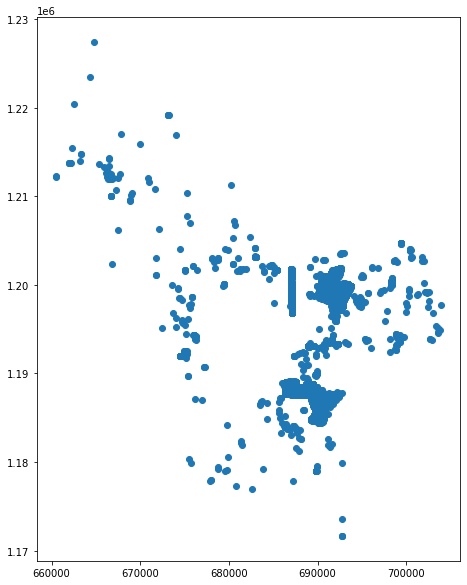

In [14]:
res.plot(figsize=(10, 10))
plt.show()

In [15]:
District = ['Thu Duc', 'Hoc Mon', 'Binh Chanh', 'Binh Tan', 'Nha Be', 'Cu Chi', 'District 9' , 'District 12', 'District 2', 'District 7']
list_dis = []

for dis in District:
  temp = res[res['Dist_Name'] == dis]
  list_dis.append(temp)

list_dis[0]

,dbh,geometry,index_right,Dist_Name,Grow_rate
0,1,POINT (687074.226 1200044.747),15.0,Thu Duc,1.092283
5,1,POINT (691440.136 1200531.193),15.0,Thu Duc,1.092283
11,1,POINT (691905.913 1199797.739),15.0,Thu Duc,1.092283
12,1,POINT (691947.773 1199339.827),15.0,Thu Duc,1.092283
13,1,POINT (691510.499 1200207.738),15.0,Thu Duc,1.092283
...,...,...,...,...,...
83660,1,POINT (691787.241 1199296.626),15.0,Thu Duc,1.092283
83661,1,POINT (692956.866 1199855.530),15.0,Thu Duc,1.092283
83666,1,POINT (692150.603 1198299.366),15.0,Thu Duc,1.092283
83667,1,POINT (692728.451 1199608.364),15.0,Thu Duc,1.092283


In [19]:
point_list = []

for dis in list_dis:
  pDistrict = []
  for pp in dis['geometry']:
    pDistrict.append([pp.x,pp.y])
  pDistrict = np.array(pDistrict)
  point_list.append(pDistrict)

In [24]:
dis_plot = []
list_index = []

for _ in range(len(point_list)):
  kmeans = KMeans(n_clusters=20, random_state=0).fit(point_list[_])
  list_dis[_]['Cluster'] =  kmeans.labels_
  arr = kmeans.labels_
  unique, counts = np.unique(arr, return_counts=True)
  d = dict(zip(unique, counts))
  list_index.append(max(d, key=d.get))
  most_cluster = max(d, key=d.get)
  dis_plot.append(list_dis[_][list_dis[_]['Cluster'] ==  most_cluster])

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [25]:
kmeans.labels_

array([15,  5, 11, ...,  8, 18, 11], dtype=int32)

In [26]:
dis_plot_crs, all_coordinates = [], []

for dis in dis_plot:
  dis_plot_crs.append(dis.to_crs(epsg=4326))

for dis in dis_plot_crs:
  array_lst = [[geom.xy[1][0], geom.xy[0][0]] for geom in dis.geometry]
  all_coordinates.append(array_lst)

In [27]:
!apt-get update 
!apt install chromium-chromedriver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.9 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hi

In [28]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [29]:
MAP = folium.Map(location=[10.8, 107], zoom_start=10, tiles='CartoDB positron')

In [30]:
for _ in range(0,10):
  HeatMap(all_coordinates[_]).add_to(MAP)

delay=5
fn='my_map.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
MAP.save(fn)

driver.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
driver.save_screenshot('my_map.png')
driver.quit()

!rm my_map.html
!rm geckodriver.log

MAP

rm: cannot remove 'geckodriver.log': No such file or directory
